Which education pathway results in a higher expected net financial position by age 45, attending CU Boulder or Colorado School of Mines, when accounting for tuition, living expenses, and projected earnings?

Random Variables Combined:

T = Tuition and fees

CU Boulder: $12,500/year

Mine's: $17,000/year

L = Living expenses (choose one housing type)

Dorms: u = $35,000

Roommates: u = $22,000

Own place: u = $32,000

E = Post-college annual living expenses = $40,000

S1 = Starting salary: u = $75,000

S2 = Mid-level salary: u = $110,000

S3 = Senior salary: u = $140,000

S4 = Manager salary: u = $180,000

One Trial Example (CU Boulder + Dorms):

Tuition: 4 × $12,500 = $50,000

Dorms: 4 × $35,000 = $140,000

Assumptions: 1. Education Duration and Costs

Each student completes their bachelor's degree in 4 years with no interruptions or delays.

Tuition and fees are fixed:

CU Boulder: $12,500 per year

Colorado School of Mines: $17,000 per year

Students live in the same housing type all four years (e.g. dorms) with a fixed annual cost:

Dorm: $35,000

Roommates: $22,000

Own place: $32,000

2. Career Timeline

Every graduate starts working immediately after graduation (no gap years or grad school).

Career follows a fixed 4-stage path:

3 years at starting level

7 years at mid-level

8 years at senior level

4 years as a manager

No job loss, unemployment, or career breaks are considered.

3. Salaries

Each career stage has a normally distributed salary with defined mean and standard deviation:

Starting: Mean $75,000, SD $8,000

Mid: Mean $110,000, SD $15,000

Senior: Mean $140,000, SD $20,000

Manager: Mean $180,000, SD $25,000

Salaries are independent of the school attended.

Salaries are redrawn randomly for each trial and career stage (not fixed growth for an individual).

4. Living Expenses After Graduation

Each person spends a fixed $40,000 per year on living costs after graduation (no change over time or inflation).

These costs are the same for all graduates, regardless of income or school.

5. Financial Position Calculation

Net Financial Position = Total Career Earnings − Tuition − College Living Costs − Post-College Living Expenses

The model does not include:

Taxes

Loan interest or repayments

Retirement savings

Investments or returns

Scholarships or financial aid

Family support or side income

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


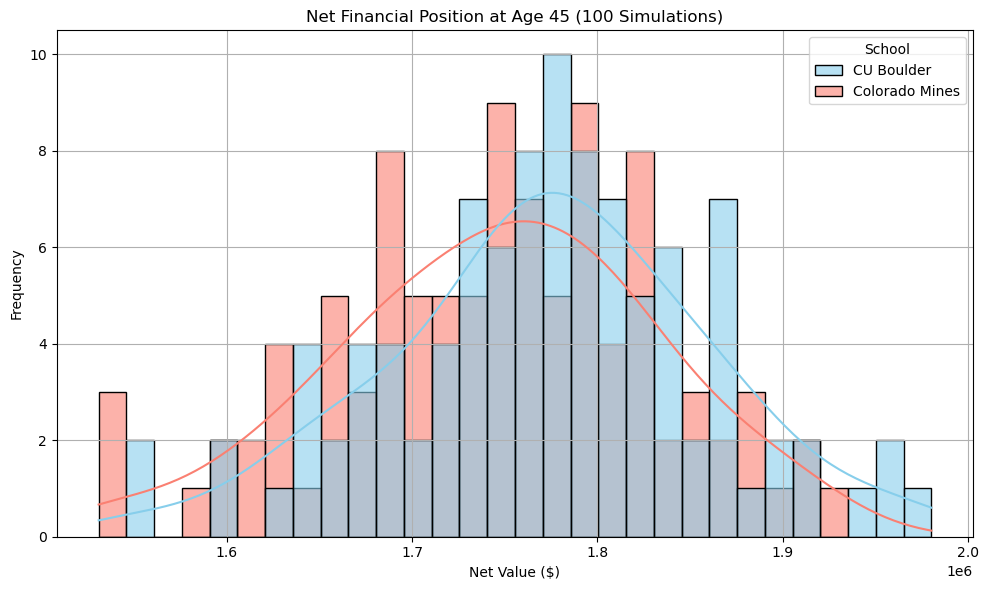

In [4]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# --- INPUT PARAMETERS ---

# Tuition (4 years)
tuition_boulder = 12500 * 4
tuition_mines = 17000 * 4

# Housing type: 'dorm', 'roommates', 'own_place'
housing_type = 'dorm'

housing_costs = {
    'dorm': 35000,
    'roommates': 22000,
    'own_place': 32000
}

college_living_boulder = housing_costs[housing_type] * 4
college_living_mines = housing_costs[housing_type] * 4

# Post-college expenses
annual_expenses = 40000
working_years = 22
total_post_college_expenses = annual_expenses * working_years

# Salary stages: (mean, std, years)
salary_stages = {
    'starting': (75000, 8000, 3),
    'mid': (110000, 15000, 7),
    'senior': (140000, 20000, 8),
    'manager': (180000, 25000, 4)
}

# --- FUNCTION TO SIMULATE TOTAL EARNINGS ---

def simulate_total_earnings():
    total = 0
    for mean, std, years in salary_stages.values():
        earnings = np.random.normal(loc=mean, scale=std, size=years)
        total += earnings.sum()
    return total

# --- RUN SIMULATION FOR 100 TRIALS ---

trials = 100
results = []

for _ in range(trials):
    earnings_boulder = simulate_total_earnings()
    net_boulder = earnings_boulder - tuition_boulder - college_living_boulder - total_post_college_expenses

    earnings_mines = simulate_total_earnings()
    net_mines = earnings_mines - tuition_mines - college_living_mines - total_post_college_expenses

    results.append({
        'School': 'CU Boulder',
        'NetPosition': net_boulder
    })
    results.append({
        'School': 'Colorado Mines',
        'NetPosition': net_mines
    })

# --- CREATE DATAFRAME FOR VISUALIZATION ---

import pandas as pd
df = pd.DataFrame(results)

# --- SEABORN HISTOGRAM ---

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='NetPosition', hue='School', bins=30, kde=True, palette=['skyblue', 'salmon'], alpha=0.6)
plt.title('Net Financial Position at Age 45 (100 Simulations)')
plt.xlabel('Net Value ($)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()
